## Python skills assessments

In [3]:
pip install pyreadr

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import pyreadr
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
url="https://raw.githubusercontent.com/JJTF/skills_assesstments/main/Data/wage2015_subsample_inference.csv"
df=pd.read_csv(url)
df

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


Plots

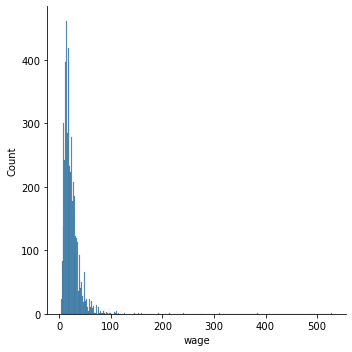

In [43]:
#Wage distribution
sns.displot(df, x="wage")

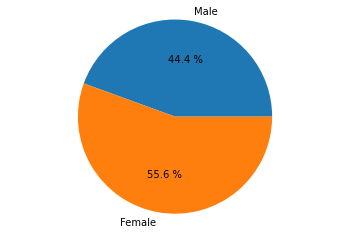

In [56]:
# Pie chart sex
sex_group = [2289,2861]
names = ["Male","Female"]
plt.pie(sex_group, labels=names, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

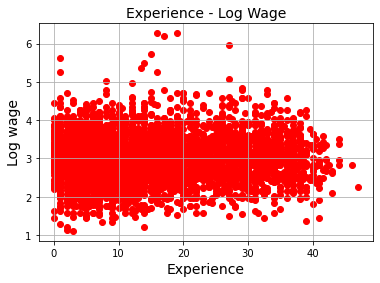

In [63]:
plt.scatter(df['exp1'], df['lwage'], color='red')
plt.title('Experience - Log Wage', fontsize=14)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Log wage', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='sex'>

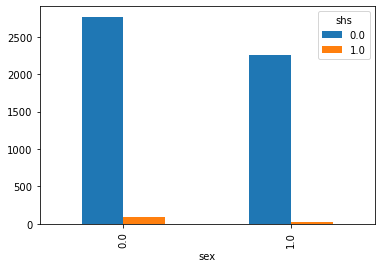

In [64]:
# Sex & Some high school
pd.crosstab(df['sex'], df['shs']).plot.bar()

<AxesSubplot:xlabel='sex'>

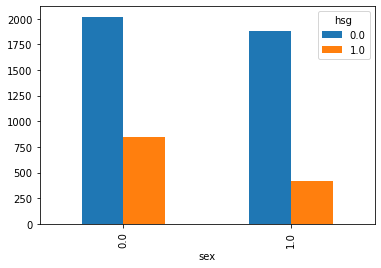

In [65]:
#Sex & High school graduated
pd.crosstab(df['sex'], df['hsg']).plot.bar()

<AxesSubplot:xlabel='sex'>

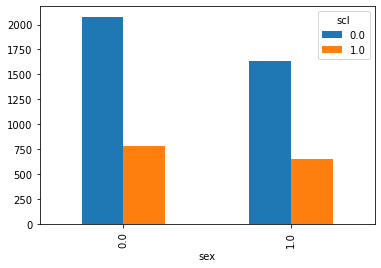

In [66]:
#Sex & Some college
pd.crosstab(df['sex'], df['scl']).plot.bar()

<AxesSubplot:xlabel='sex'>

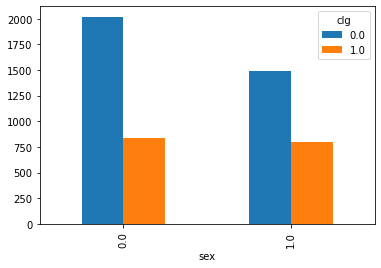

In [67]:
# Sex & College graduated
pd.crosstab(df['sex'], df['clg']).plot.bar()

In [112]:
#OLS to basic model
basic_model = 'lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2'
bm = smf.ols( formula = basic_model, data = df )
control_est_bm = bm.fit().summary2().tables[1]['Coef.']['sex']
print(bm.fit().summary2().tables[1])

              Coef.  Std.Err.           t          P>|t|    [0.025    0.975]
Intercept  3.468155  0.030755  112.767499   0.000000e+00  3.407862  3.528447
sex       -0.099895  0.015142   -6.597029   4.616442e-11 -0.129580 -0.070209
exp1       0.007705  0.000696   11.066786   3.772227e-28  0.006340  0.009070
shs       -0.374068  0.048793   -7.666451   2.100886e-14 -0.469722 -0.278413
hsg       -0.274420  0.018240  -15.044721   4.300518e-50 -0.310178 -0.238661
mw        -0.055281  0.020769   -2.661683   7.799295e-03 -0.095997 -0.014564
so        -0.026462  0.020128   -1.314678   1.886769e-01 -0.065922  0.012998
we         0.004337  0.021683    0.200017   8.414751e-01 -0.038171  0.046845
occ2      -0.025539  0.001151  -22.192947  2.770129e-104 -0.027795 -0.023283
ind2      -0.012317  0.001364   -9.029483   2.393845e-19 -0.014991 -0.009643


AttributeError: 'numpy.float64' object has no attribute 'rsquared'

In [109]:
#flexible model

flexible_model = 'lwage ~ sex + (exp1+ exp2+ exp3+ exp4+ shs + hsg + occ2+ind2 + mw + so + we)**2'
fm = smf.ols( formula = flexible_model, data = df )
control_est_fm = fm.fit().summary2().tables[1]['Coef.']['sex']
print(fm.fit().summary2().tables[1])

              Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
Intercept  3.562530  0.136397  26.118922  3.137853e-141  3.295134  3.829926
sex       -0.093232  0.015112  -6.169410   7.384696e-10 -0.122858 -0.063606
exp1      -0.062632  0.059278  -1.056570   2.907580e-01 -0.178843  0.053579
exp2       1.471719  1.219378   1.206942   2.275105e-01 -0.918787  3.862224
exp3      -0.012915  0.014153  -0.912522   3.615370e-01 -0.040660  0.014831
...             ...       ...        ...            ...       ...       ...
ind2:so    0.002080  0.003778   0.550520   5.819866e-01 -0.005327  0.009486
ind2:we   -0.005226  0.004061  -1.286739   1.982437e-01 -0.013188  0.002736
mw:so      0.000000  0.000000        NaN            NaN  0.000000  0.000000
mw:we      0.000000  0.000000        NaN            NaN  0.000000  0.000000
so:we      0.000000  0.000000        NaN            NaN  0.000000  0.000000

[68 rows x 6 columns]


In [ ]:
# To get the R2 and MSE
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print result.rsquared, result.rsquared_adj

In [14]:
int1 = df[df["clg"]==1]
exp= int1[df["exp1"]]
value1 = df["lwage"]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(exp, value1, color='red',label="")

ax.set(title = "",
       xlabel = "",
       ylabel = "")

plt.show()

KeyError: "None of [Float64Index([ 7.0, 31.0, 18.0, 25.0, 22.0,  1.0, 42.0, 37.0, 31.0,  4.0,\n              ...\n               5.0, 15.0, 11.0, 17.0, 10.0,  9.0, 12.0, 11.0, 10.0, 14.0],\n             dtype='float64', length=5150)] are in the [columns]"

In [ ]:
ax.annotate('835', (mdates.date2num(date[24]), value1[24]), xytext=(-30,20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('57', (mdates.date2num(date[24]), value2[24]), xytext=(-30, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('277', (mdates.date2num(date[24]), value3[24]), xytext=(-30, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('754', (mdates.date2num(date[16]), value1[16]), xytext=(-5, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('57', (mdates.date2num(date[16]), value2[16]), xytext=(-1, 20) ,
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('278', (mdates.date2num(date[16]), value3[16]), xytext=(-1, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('815', (mdates.date2num(date[20]), value1[20]), xytext=(-1, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('57', (mdates.date2num(date[20]), value2[20]), xytext=(-1, 20) ,
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
ax.annotate('278', (mdates.date2num(date[20]), value3[20]), xytext=(-1, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'),fontsize=14)
#ax.annotate('1 897', (mdates.date2num(date[24]), value1[24]), xytext=(-30, -30), 
  #          textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
#ax.annotate('796', (mdates.date2num(date[25]), value2[25]), xytext=(10, 10), 
 #           textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.legend(loc = 'upper left')